In [1]:
import os
import cv2
import pytesseract
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Step 1: Data Preparation
data_folder = 'C:/Users/Syed Issam Bukhari/Documents/projects all/projects/islamop/Memes'  # Root folder containing all the image folders

In [39]:
# Step 2: Text Detection
def extract_text_from_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    text = pytesseract.image_to_string(gray)
    return text


In [40]:
# Step 3: Feature Extraction for Text Classification
def extract_text_features(data_folder):
    images = []
    labels = []
    for class_label, class_name in enumerate(os.listdir(data_folder)):
        class_folder = os.path.join(data_folder, class_name)
        if not os.path.isdir(class_folder):
            continue
        for file_name in os.listdir(class_folder):
            file_path = os.path.join(class_folder, file_name)
            image = extract_text_from_image(file_path)
            images.append(image)
            labels.append(class_label)
    vectorizer = TfidfVectorizer()
    text_features = vectorizer.fit_transform(images)
    return text_features, labels, vectorizer  # Return the vectorizer

text_features, labels, vectorizer = extract_text_features(data_folder)  # Now extract the vectorizer

In [41]:
# Step 4: Model Training for Text Classification
text_model = SVC(kernel='linear')
text_model.fit(text_features, labels)

SVC(kernel='linear')

In [42]:
# Step 5: Model Evaluation for Text Classification
text_pred = text_model.predict(text_features)

text_accuracy = accuracy_score(labels, text_pred)
text_precision = precision_score(labels, text_pred, average='weighted')
text_recall = recall_score(labels, text_pred, average='weighted')
text_f1_score = f1_score(labels, text_pred, average='weighted')

print("Text Accuracy:", text_accuracy)
print("Text Precision:", text_precision)
print("Text Recall:", text_recall)
print("Text F1-score:", text_f1_score)

Text Accuracy: 0.42925
Text Precision: 0.45541389663364085
Text Recall: 0.42925
Text F1-score: 0.4233844220830174


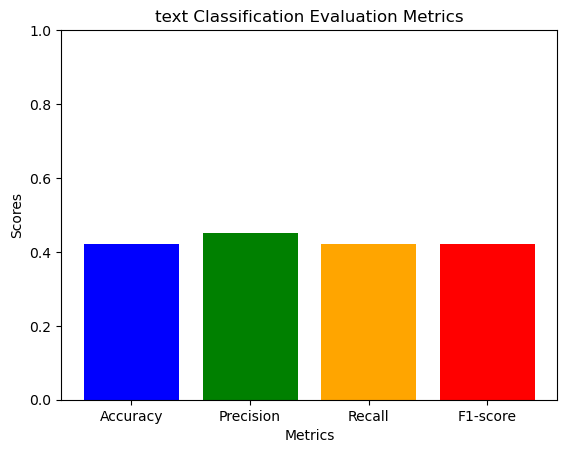

In [14]:

text_accuracy = 0.42
text_precision = 0.45
text_recall = 0.42
text_f1_score = 0.42

# List of metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# List of corresponding metric values
metric_values = [text_accuracy, text_precision, text_recall, text_f1_score]

# Plotting the bar plot
plt.bar(metrics, metric_values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('text Classification Evaluation Metrics')
plt.ylim(0.0, 1.0)
plt.show()


In [43]:
# Step 6: Save Text Model and Vectorizer
text_model_file = 'text_model.pkl'
joblib.dump(text_model, text_model_file)

vectorizer_file = 'vectorizer.pkl'
joblib.dump(vectorizer, vectorizer_file)

print("Text Model and Vectorizer saved successfully.")

Text Model and Vectorizer saved successfully.


In [3]:
# Step 7: Load and Preprocess Images for Nature Classification
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))  # Resize image to fit CNN model input shape
    img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
    return img


In [4]:
def load_images(data_folder):
    images = []
    labels = []
    for class_label, class_name in enumerate(os.listdir(data_folder)):
        class_folder = os.path.join(data_folder, class_name)
        if not os.path.isdir(class_folder):
            continue
        for file_name in os.listdir(class_folder):
            file_path = os.path.join(class_folder, file_name)
            image = preprocess_image(file_path)
            images.append(image)
            labels.append(class_label)
    return np.array(images), np.array(labels)

all_images, all_labels = load_images(data_folder)

In [5]:
# Step 8: Model Training for Nature Classification
nature_model = Sequential()
nature_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
nature_model.add(MaxPooling2D((2, 2)))
nature_model.add(Conv2D(64, (3, 3), activation='relu'))
nature_model.add(MaxPooling2D((2, 2)))
nature_model.add(Conv2D(128, (3, 3), activation='relu'))
nature_model.add(MaxPooling2D((2, 2)))
nature_model.add(Flatten())
nature_model.add(Dense(128, activation='relu'))
nature_model.add(Dense(len(set(all_labels)), activation='softmax'))
# Print the model summary
nature_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [6]:
nature_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nature_model.fit(all_images, all_labels, epochs=100, batch_size=32)

Epoch 1/100
125/125 [==============================] - 190s 2s/step - loss: 1.4983 - accuracy: 0.3043
Epoch 2/100
125/125 [==============================] - 191s 2s/step - loss: 1.2050 - accuracy: 0.3540
Epoch 3/100
125/125 [==============================] - 198s 2s/step - loss: 1.0461 - accuracy: 0.3965
Epoch 4/100
125/125 [==============================] - 192s 2s/step - loss: 0.9086 - accuracy: 0.4340
Epoch 5/100
125/125 [==============================] - 185s 1s/step - loss: 0.8213 - accuracy: 0.4765
Epoch 6/100
125/125 [==============================] - 185s 1s/step - loss: 0.7767 - accuracy: 0.4818
Epoch 7/100
125/125 [==============================] - 185s 1s/step - loss: 0.7721 - accuracy: 0.4875
Epoch 8/100
125/125 [==============================] - 186s 1s/step - loss: 0.7579 - accuracy: 0.4882
Epoch 9/100
125/125 [==============================] - 185s 1s/step - loss: 0.7513 - accuracy: 0.4885
Epoch 10/100
125/125 [==============================] - 184s 1s/step - loss: 0.745

125/125 [==============================] - 210s 2s/step - loss: 0.7150 - accuracy: 0.5015
Epoch 81/100
125/125 [==============================] - 210s 2s/step - loss: 0.7151 - accuracy: 0.4812
Epoch 82/100
125/125 [==============================] - 230s 2s/step - loss: 0.7158 - accuracy: 0.4767
Epoch 83/100
125/125 [==============================] - 210s 2s/step - loss: 0.7135 - accuracy: 0.4888
Epoch 84/100
125/125 [==============================] - 210s 2s/step - loss: 0.7154 - accuracy: 0.4798
Epoch 85/100
125/125 [==============================] - 212s 2s/step - loss: 0.7130 - accuracy: 0.4915
Epoch 86/100
125/125 [==============================] - 211s 2s/step - loss: 0.7169 - accuracy: 0.4913
Epoch 87/100
125/125 [==============================] - 210s 2s/step - loss: 0.7166 - accuracy: 0.4778
Epoch 88/100
125/125 [==============================] - 210s 2s/step - loss: 0.7176 - accuracy: 0.4863
Epoch 89/100
125/125 [==============================] - 210s 2s/step - loss: 0.7158 - 

In [7]:
# Step 9: Model Evaluation for Nature Classification
nature_pred = np.argmax(nature_model.predict(all_images), axis=-1)

nature_accuracy = accuracy_score(all_labels, nature_pred)
nature_precision = precision_score(all_labels, nature_pred, average='weighted')
nature_recall = recall_score(all_labels, nature_pred, average='weighted')
nature_f1_score = f1_score(all_labels, nature_pred, average='weighted')

print("Nature Accuracy:", nature_accuracy)
print("Nature Precision:", nature_precision)
print("Nature Recall:", nature_recall)
print("Nature F1-score:", nature_f1_score)


125/125 [==============================] - 50s 402ms/step
Nature Accuracy: 0.494
Nature Precision: 0.4926929740968552
Nature Recall: 0.494
Nature F1-score: 0.3890766878086295


In [8]:
# Step 10: Save Nature Model

nature_model_file = 'nature_model.h5'
nature_model.save(nature_model_file)
print("Nature Model saved successfully.")

Nature Model saved successfully.


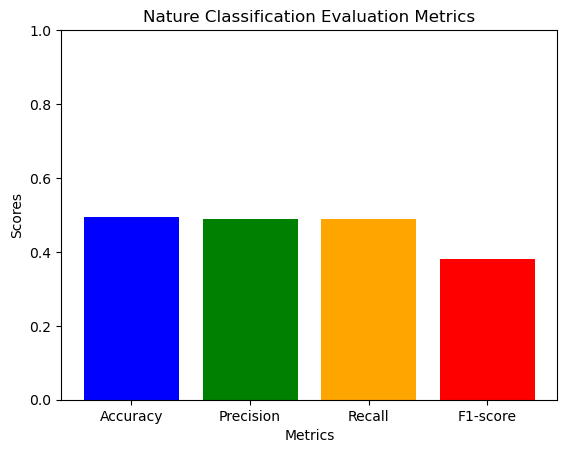

In [12]:
nature_accuracy = 0.494
nature_precision = 0.49
nature_recall = 0.49
nature_f1_score = 0.38

# List of metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# List of corresponding metric values
metric_values = [nature_accuracy, nature_precision, nature_recall, nature_f1_score]

# Plotting the bar plot
plt.bar(metrics, metric_values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Nature Classification Evaluation Metrics')
plt.ylim(0.0, 1.0)
plt.show()
